# Perceptron Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import tensor

%matplotlib inline

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["class"] = df.species.apply(lambda x: 1 if x=='setosa' else -1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [27]:
t_type = torch.float64

def add_ones(X):
    """
    Add a column of ones at the left hand side of matrix X
    X: (N, d) tensor
    Returns
        (N, d+1) tensor
    """
    ones = torch.ones((X.shape[0],1), dtype=t_type)
    X = torch.cat((ones, X), dim=-1)
    return X

def make_tensor(*args):
    """
    Check if arguments are tensor, converts arguments to tensor
    accepts and returns Iterables
    """
    tensors = [el if torch.is_tensor(el) else tensor(el, dtype=t_type) for el in args ]
    return tensors[0] if len(tensors)==1 else tensors

In [28]:
t_type = torch.float64

X = df[df.columns[:3]].values
y = df["class"].values
X, y = make_tensor(X, y)

In [29]:
X_b = add_ones(X)
y = y.reshape(-1, 1)

Using the count of the number of misclassified points as a loss
function is not good as this is a piecewise constant, which means
that its gradient is zero almost everywhere and gradient descent
methods will not work.

Instead we define the perceptron criterion:
$$\mathcal{L}_p = - \sum_{i \in \mathcal{M}} y^{(i)} \langle \theta, x^{(i)}\rangle$$
where $\mathcal{M}$ is the set of misclassified points.

In [234]:
def signum(z):
    return 1 if z >= 0 else -1

def calc_loss(X, y, theta):
    # perceptron criterion
    total_loss = torch.zeros((1,1), dtype=t_type)
    N, d = X.shape
    for i in range(N):
        x_i = X[i, :].reshape(-1, 1) 
        y_i = y[i, :].reshape(-1, 1)
        z = x_i.t()@theta
        if signum(z) != y_i.item():
            total_loss =- y_i@z
            
    return total_loss.item()

## Perceptron Algorithm

1) Pick point $x^{(i)}$ 

2) For all i from 1 to n-1

- If $y^{(i)} \langle \theta(t), x^{(i)}\rangle \geq 0$, do continue next point

- else perform the update rule

- Update rule: $\theta(t + 1) = \theta(t) - \alpha \cdot gradient$ <br>
where gradient = $x^{(i)} y^{(i)}$

Update rule: 
$$\begin{aligned} \theta(t + 1) 
&= \theta(t) - \alpha \cdot gradient \\
&= \theta(t) - \alpha \cdot \nabla \mathcal{L}_p (\theta(t)) \\
&= \theta(t) - \alpha \cdot x^{(i)} y^{(i)} \end{aligned}
$$
where gradient = $x^{(i)} y^{(i)}$

In [235]:
def update_theta(x_i, y_i, theta, alpha=0.01):
    # data point -> rows
    # reshape to make column vector

    grad = x_i@y_i
    theta = theta + alpha*grad
    return theta

def is_seperable(x_i, y_i, theta):
    return y_i @ theta.t()@x_i >= 0

def perceptron_algorithm(X, y, theta, alpha=0.01):
    N, d = X.shape
    theta = torch.randn((d,1), dtype=t_type)
    
    loss_history = [calc_loss(X, y, theta)]
    theta_history = [theta.tolist()]
    
    for i in range(N):
        x_i = X[i, :].reshape(-1, 1) 
        y_i = y[i, :].reshape(-1, 1)
        if is_seperable(x_i, y_i, theta):
            continue
        else:
            theta = update_theta(x_i, y_i, theta)
            theta_history.append(theta.tolist())
            
            loss = calc_loss(X, y, theta)
            loss_history.append(loss)
            
    return theta, theta_history, loss_history

In [236]:
N, d = X.shape
theta_random = torch.randn((d,1), dtype=t_type)
theta_random.tolist()

[[0.6165114117495851],
 [0.03355670253425995],
 [0.25980245869341484],
 [-0.7360357120392427]]

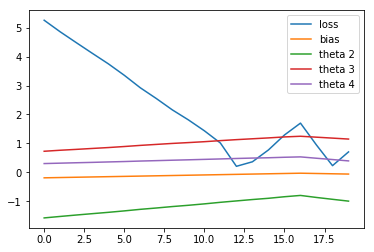

In [245]:
theta, theta_history, loss_history = perceptron_algorithm(X, y, theta=theta_random, alpha=0.01)
plt.plot(loss_history, label="loss")
for i in range(d):
    label = 'bias' if i == 0 else f'theta {i+1}'
    plt.plot(
        np.array(theta_history)[:, i]
        , label=label)
plt.legend()

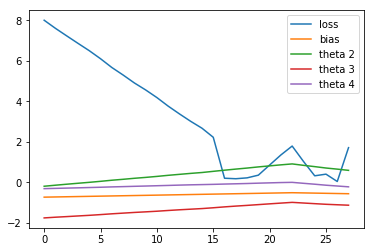

In [240]:
for alpha in [1, 0.5, 0.1, 0.05]:
    theta, theta_history, loss_history = perceptron_algorithm(X, y, theta=theta_random, alpha=0.01)